In [1]:
import json
import pandas as pd
import spacy
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nlp = spacy.load("pl_core_news_lg")

In [2]:
translation = ['park rozrywki',
               'zwierzęta',
               'ławka',
               'budynek',
               'zamek',
                'jaskinia',
              'kościół',
              'miasto',
              'krzyż',
              'kultura',  # kultura
              'jedzenie',
               'chodnik',
              'las',
              'meble',
              'trawa',
              'cmentarz',
              'jezioro',
              'kopalnia',
              'pomnik',
              'pojazd',  # pojazd
               'góry',
               'muzeum',
               'skansen',
               'park',
               'osoba',
               'rośliny',
               'rezerwuar',
               'rzeka',
               'droga',
               'skały',
               'śnieg',
               'sport',
               'obiekt sportowy',
               'schody',
               'drzewa',
               'statek',
               'okna'
              ]

In [3]:
with open('opisy.json') as f:
    dict_txt = json.load(f)

In [4]:
def get_topics_in_text(opis_dict):
    df = pd.DataFrame()
    for i in range(len(list(dict_txt.keys()))):
        for key, value in dict_txt[list(dict_txt.keys())[i]].items():
            doc = nlp(value)
            list_out = [(t.orth_, t.lemma_, key) for t in doc]
            df = df.append(pd.DataFrame(list_out, columns=['forma','lemat', 'timestamp']))
    df['is_in_topics'] = df['lemat'].apply(lambda x: x in translation)
    return df.reset_index(drop=True)
    

In [5]:
df = get_topics_in_text(dict_txt)

In [6]:
df[df['is_in_topics'] == True]['lemat'].value_counts()

kościół     103
budynek      60
miasto       58
park         40
muzeum       22
kopalnia     19
cmentarz     18
rzeka        16
zamek        16
góry         12
droga        11
las          10
pomnik        7
kultura       6
skansen       6
osoba         6
jezioro       5
sport         3
jaskinia      2
Name: lemat, dtype: int64

<AxesSubplot:ylabel='Frequency'>

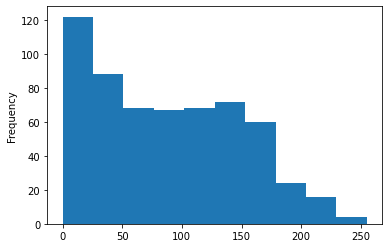

In [11]:
df[df['is_in_topics']==True]['timestamp'].astype('float').plot.hist()

## Wordclouds

In [12]:
from wordcloud import WordCloud

In [14]:
stopwords_ = ['ach', 'aj', 'albo', 'bardzo', 'bez', 'bo', 'być', 'ci', 'cię', 'ciebie', 'co', 'czy', 'daleko', 'dla', 'dlaczego', 'dlatego', 'do', 'dobrze', 'dokąd', 'dość', 'dużo', 'dwa', 'dwaj', 'dwie', 'dwoje', 'dziś', 'dzisiaj', 'gdyby', 'gdzie', 'go', 'ich', 'ile', 'im', 'inny', 'ja', 'ją', 'jak', 'jakby', 'jaki', 'je', 'jeden', 'jedna', 'jedno', 'jego', 'jej', 'jemu', 'jeśli', 'jest', 'jestem', 'jeżeli ', 'już', 'każdy', 'kiedy', 'kierunku', 'kto', 'ku', 'lub', 'ma', 'mają', 'mam', 'mi', 'mną', 'mnie', 'moi', 'mój', 'moja', 'moje', 'może', 'mu', 'my', 'na', 'nam', 'nami', 'nas', 'nasi', 'nasz', 'nasza', 'nasze', 'natychmiast', 'nią', 'nic', 'nich', 'nie', 'niego', 'niej', 'niemu', 'nigdy', 'nim', 'nimi', 'niż', 'obok', 'od', 'około', 'on', 'ona', 'one', 'oni', 'ono', 'owszem', 'po \tpod', 'ponieważ', 'przed', 'przedtem', 'są', 'sam', 'sama', 'się', 'skąd', 'tak', 'taki', 'tam', 'ten', 'to', 'tobą', 'tobie', 'tu', 'tutaj', 'twoi', 'twój', 'twoja', 'twoje', 'ty', 'wam', 'wami', 'was', 'wasi', 'wasz', 'wasza', 'wasze', 'we', 'więc', 'wszystko', 'wtedy', 'wy', 'żaden', 'zawsze', 'że']

In [22]:
freqs = dict(df['lemat'].value_counts())
freqs_good = dict(df[df['is_in_topics'] == True]['lemat'].value_counts())

In [23]:
wordcloud = WordCloud(width=800, height=400, stopwords=stopwords_).generate_from_frequencies(freqs_good)

(-0.5, 799.5, 399.5, -0.5)

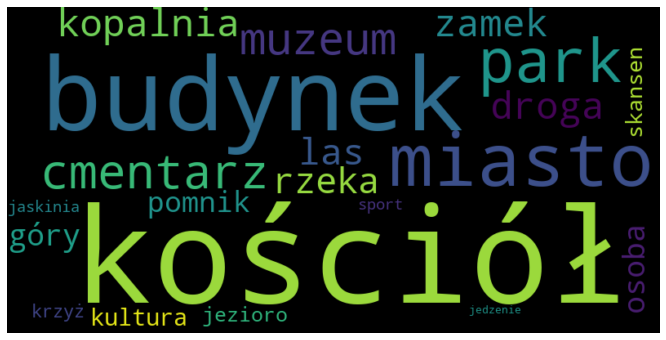

In [24]:
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## LDA

In [32]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/arkadiusz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
def lemmatize_stemming(text):
    stemmer = PorterStemmer()
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [30]:
dict_txt[list(dict_txt.keys())[0]]['0.0']

'Zagłębie Dąbrowskie na swoje własne małe Mazury Pojezierze'

In [36]:
doc_sample = dict_txt[list(dict_txt.keys())[0]]['0.0']
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['Zagłębie', 'Dąbrowskie', 'na', 'swoje', 'własne', 'małe', 'Mazury', 'Pojezierze']


 tokenized and lemmatized document: 
['zagłębi', 'dąbrowski', 'swoje', 'własn', 'małe', 'mazuri', 'pojezierz']


In [39]:
przeprocesowany = []
for i in range(len(list(dict_txt.keys()))):
        for key, value in dict_txt[list(dict_txt.keys())[i]].items():
            przeprocesowany.append(preprocess(value))

In [40]:
przeprocesowany

[['zagłębi', 'dąbrowski', 'swoje', 'własn', 'małe', 'mazuri', 'pojezierz'],
 ['borowski', 'suszu', 'nazwą', 'określa', 'czasami'],
 ['zbiorników', 'wodnych', 'dąbrowi', 'górniczej', 'znanych', 'wspólną'],
 ['pogorii', 'pogoria', 'pogoria'],
 ['wypoczynku', 'rekreacji', 'przyciągają', 'plażami', 'kąpię'],
 ['pensjonatami', 'padami', 'oraz', 'klubami', 'jachtowym'],
 ['ceni', 'upodobali', 'sobi', 'wędkarz', 'rzadki', 'gatunki', 'ptaków'],
 ['czeka', 'największ', 'jezioro', 'pogoria'],
 ['pojezierz',
  'dąbrowski',
  'powstało',
  'dzięki',
  'działa',
  'ilości',
  'zagłębiowskiej'],
 ['kopalni', 'terenach', 'położonych', 'północ', 'dzisiejszego'],
 ['dąbrowi',
  'górniczej',
  'przez',
  'dziesięciolecia',
  'zyskiwałi',
  'zwanej',
  'piasek'],
 ['wypełniałi', 'pustki'],
 ['wyrobiska', 'rekultywować', 'napełniłi', 'czystą'],
 ['pierwszym', 'zbiorniku', 'pochodziła', 'dużej', 'części', 'spłynąć'],
 ['pogorii', 'stąd', 'wzięła', 'nazwa', 'wszystkich'],
 ['synów', 'jezioro', 'pogoria', 'p

In [41]:
dictionary = gensim.corpora.Dictionary(przeprocesowany)

In [42]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 dąbrowski
1 mazuri
2 małe
3 pojezierz
4 swoje
5 własn
6 zagłębi
7 borowski
8 czasami
9 nazwą
10 określa


In [43]:
dictionary.filter_extremes(no_below=3, no_above=0.7, keep_n=100000)

In [45]:
bow_corpus = [dictionary.doc2bow(doc) for doc in przeprocesowany]
#bow_corpus[100]

[(51, 1), (173, 1), (174, 1)]

In [46]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.585403025316741), (1, 0.585403025316741), (2, 0.5608980262935627)]


In [49]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=20, id2word=dictionary, passes=3, workers=5)

In [50]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.043*"przez" + 0.031*"roku" + 0.030*"wieku" + 0.022*"latach" + 0.019*"jest" + 0.018*"jako" + 0.015*"tereni" + 0.013*"około" + 0.012*"miejscowość" + 0.011*"wojni"
Topic: 1 
Words: 0.025*"jest" + 0.020*"można" + 0.015*"trzi" + 0.015*"której" + 0.015*"został" + 0.014*"tereni" + 0.014*"budynek" + 0.013*"tego" + 0.013*"wzniesioni" + 0.013*"boczn"
Topic: 2 
Words: 0.110*"takż" + 0.021*"jest" + 0.014*"kilka" + 0.014*"latach" + 0.012*"oraz" + 0.011*"innych" + 0.011*"umieszczono" + 0.010*"nazwą" + 0.010*"przi" + 0.009*"budynku"
Topic: 3 
Words: 0.017*"wówcza" + 0.015*"oraz" + 0.014*"jest" + 0.013*"bardzo" + 0.013*"polski" + 0.013*"wieku" + 0.013*"była" + 0.012*"takż" + 0.012*"latach" + 0.012*"wojni"
Topic: 4 
Words: 0.028*"jest" + 0.016*"przed" + 0.016*"czasów" + 0.014*"początki" + 0.013*"tutaj" + 0.013*"historii" + 0.012*"karol" + 0.012*"około" + 0.010*"miejscowości" + 0.009*"przykład"
Topic: 5 
Words: 0.044*"międzi" + 0.042*"innymi" + 0.027*"jest" + 0.019*"oraz" + 0.015*"wie

In [52]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=20, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.020*"około" + 0.013*"przi" + 0.013*"oraz" + 0.012*"roku" + 0.011*"pilici" + 0.011*"znajduj" + 0.011*"przez" + 0.010*"wzgórzu" + 0.010*"jest" + 0.009*"więc"
Topic: 1 Word: 0.013*"budowli" + 0.012*"miejsc" + 0.011*"miejscowości" + 0.010*"świętego" + 0.010*"domu" + 0.010*"ponadto" + 0.009*"august" + 0.008*"jest" + 0.008*"maria" + 0.007*"lasi"
Topic: 2 Word: 0.047*"latach" + 0.031*"jest" + 0.030*"takż" + 0.016*"świętej" + 0.015*"przez" + 0.012*"została" + 0.011*"głównie" + 0.011*"skład" + 0.010*"ryzalit" + 0.009*"kopalni"
Topic: 3 Word: 0.020*"koniec" + 0.017*"muzeum" + 0.016*"świątyni" + 0.014*"cegłi" + 0.013*"zarówno" + 0.012*"przez" + 0.011*"takż" + 0.010*"śląskiego" + 0.010*"trasa" + 0.010*"wieku"
Topic: 4 Word: 0.040*"tutaj" + 0.016*"takż" + 0.011*"również" + 0.011*"dziś" + 0.010*"władysława" + 0.010*"obecni" + 0.010*"bożej" + 0.010*"instytucji" + 0.010*"matki" + 0.010*"obraz"
Topic: 5 Word: 0.015*"oraz" + 0.013*"przi" + 0.013*"można" + 0.012*"klasztoru" + 0.011*"podc

In [53]:
for index, score in sorted(lda_model[bow_corpus[100]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.7624902129173279	 
Topic: 0.058*"wieku" + 0.023*"koniec" + 0.015*"jednak" + 0.013*"poziomem" + 0.011*"tereni" + 0.011*"morza" + 0.011*"połowi" + 0.011*"zachodniej" + 0.010*"przełomi" + 0.009*"zwani"

Score: 0.012500516138970852	 
Topic: 0.043*"przez" + 0.031*"roku" + 0.030*"wieku" + 0.022*"latach" + 0.019*"jest" + 0.018*"jako" + 0.015*"tereni" + 0.013*"około" + 0.012*"miejscowość" + 0.011*"wojni"

Score: 0.012500516138970852	 
Topic: 0.025*"jest" + 0.020*"można" + 0.015*"trzi" + 0.015*"której" + 0.015*"został" + 0.014*"tereni" + 0.014*"budynek" + 0.013*"tego" + 0.013*"wzniesioni" + 0.013*"boczn"

Score: 0.012500516138970852	 
Topic: 0.110*"takż" + 0.021*"jest" + 0.014*"kilka" + 0.014*"latach" + 0.012*"oraz" + 0.011*"innych" + 0.011*"umieszczono" + 0.010*"nazwą" + 0.010*"przi" + 0.009*"budynku"

Score: 0.012500516138970852	 
Topic: 0.017*"wówcza" + 0.015*"oraz" + 0.014*"jest" + 0.013*"bardzo" + 0.013*"polski" + 0.013*"wieku" + 0.013*"była" + 0.012*"takż" + 0.012*"latach" + 0.0